In [1]:
import numpy as np
import matplotlib.tri as mtri
from math import *

class norm_data:

    _gap = 0.018

    def __init__(self, file):
        self.data = []
        self.narray = 27
        self.tri_elements = None
        self.columns = [[0]]
        self._init(file)

    def _init(self, file):
        self.data = np.genfromtxt(file, dtype='<f8')
        self.tri_elements = mtri.Triangulation(self.data[:, 0],
                                               self.data[:, 1])
        self.normalize()

    def _unitized(self):

        for i in range(1, len(self.data)):
            filled = False
            for col in self.columns:
                # get the x coordinate of the first data
                datum = self.data[col[0]][0]
                if abs(datum-self.data[i][0]) <= self._gap:
                    col.append(i)
                    filled = True
                    break
            # if the current data not be put into col
            if not filled:
                self.columns.append([i])


    def _arranged(self):

        # rearrange the cols in self.columns
        for col in self.columns:
            col.sort(key=lambda ind: self.data[ind][1])
        # arrange the self.columns
            self.columns.sort(key=lambda col: self.data[col[0]][0])

    def normalize(self):

        self._unitized()
        self._arranged()

        return self.columns

    # def invalid_tri(self):

class data_info:

    _datum = '../db/chongqi/0.5.txt.new'
    #_datum = '../db/2-1.txt.new'
    def __init__(self, file):
        self.nor_d = norm_data(file)
        self.lens = 0
        # self.ntris = 0
        self._init()

    def _init(self):
        self.lens = len(self.nor_d.data)
        # self.ntris = len(self.nor_d.tri_elements.triangles)

    def disp_vec(self):
        datums = norm_data(self._datum)
        d_vec = [np.array([0.0]*3) for i in range(self.lens)]
        for i in range(len(self.nor_d.columns)):
            datum_col = datums.columns[i]
            col = self.nor_d.columns[i]
            for j in range(len(col)):
                ind = col[j]
                d_vec[ind] = self.nor_d.data[ind] - datums.data[datum_col[j]]

        return d_vec


In [1]:
import pandas as pd

In [2]:
init_pos_df = pd.read_csv('../db/chongqi/0.5.txt.new', sep=' ', names=('x', 'y' , 'z'))

In [3]:
init_pos_df

,x,y,z
0,0.121380,0.064182,-0.819376
1,0.154812,0.064033,-0.819617
2,0.087431,0.063394,-0.818598
3,0.053595,0.062926,-0.819205
4,-0.047121,0.062722,-0.821810
5,0.187813,0.063164,-0.819793
6,0.019869,0.062695,-0.820241
7,-0.013366,0.061924,-0.819786
8,0.221361,0.061977,-0.820205
9,-0.113897,0.059469,-0.823400


In [9]:
pressure_10_pos_df = pd.read_csv('../db/chongqi/10.txt.new', sep=' ', names=('x', 'y', 'z'))

In [11]:
import numpy as np
pressure_10_pos_df['disp'] = pressure_10_pos_df.apply(np.sum, axis=1)

In [12]:
pressure_10_pos_df

,x,y,z,disp
0,-0.090739,0.064320,-0.819477,-0.845896
1,-0.014421,0.067146,-0.817158,-0.764434
2,-0.148992,0.060552,-0.823013,-0.911453
3,0.052368,0.068851,-0.816044,-0.694825
4,-0.182477,0.057660,-0.826100,-0.950917
5,0.120007,0.069776,-0.816093,-0.626311
6,0.153354,0.069373,-0.816263,-0.593536
7,-0.214645,0.053870,-0.829051,-0.989826
8,0.186312,0.068471,-0.816325,-0.561542
9,-0.247738,0.049723,-0.833106,-1.031121


In [37]:
x0 = np.array(pressure_10_pos_df.loc[1, :][:3])
x0

array([-0.01442222,  0.06715196, -0.81716364])

In [38]:
f = lambda x: np.sqrt(np.sum(np.square(x - x0)))

In [13]:
del pressure_10_pos_df['disp']

In [14]:
pressure_10_pos_df['disp'] = pressure_10_pos_df.apply(lambda x0: min(init_pos_df.apply(lambda x: np.sqrt(np.sum(np.square(x-x0))), axis=1)), axis=1)

In [15]:
pressure_10_pos_df

,x,y,z,disp
0,-0.090739,0.064320,-0.819477,0.005849
1,-0.014421,0.067146,-0.817158,0.005940
2,-0.148992,0.060552,-0.823013,0.005118
3,0.052368,0.068851,-0.816044,0.006827
4,-0.182477,0.057660,-0.826100,0.004379
5,0.120007,0.069776,-0.816093,0.006630
6,0.153354,0.069373,-0.816263,0.006472
7,-0.214645,0.053870,-0.829051,0.004038
8,0.186312,0.068471,-0.816325,0.006515
9,-0.247738,0.049723,-0.833106,0.003853


In [16]:
max(pressure_10_pos_df['disp'])

0.0078756863704557544

In [54]:
tri_x = pressure_10_pos_df.loc[:20, 'x'].tolist()
tri_y = pressure_10_pos_df.loc[:20, 'y'].tolist()

In [55]:
import matplotlib.tri as mtri
import matplotlib.pyplot as plt

In [63]:
figure = plt.figure()
ax = figure.add_subplot(111)

In [58]:
ax.scatter(tri_x, tri_y, s=10, c='r')

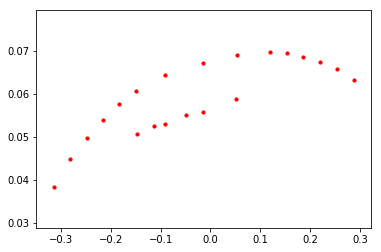

In [59]:
plt.show()

In [60]:
test_tris = mtri.Triangulation(tri_x, tri_y)

In [62]:
test_tris.triangles

array([[17, 20, 19],
       [16, 19, 20],
       [16,  1, 19],
       [ 3, 16,  5],
       [ 1, 16,  3],
       [12, 16, 20],
       [12, 10, 16],
       [ 5, 16,  6],
       [17, 19, 18],
       [18, 13, 17],
       [17, 13, 11],
       [16, 10,  8],
       [ 8,  6, 16],
       [ 9, 11, 13],
       [ 2,  4, 13],
       [15, 18, 19],
       [15,  0, 18],
       [19,  1, 15],
       [ 1,  0, 15],
       [13,  4,  7],
       [ 7,  9, 13],
       [18,  0, 14],
       [ 0,  2, 14],
       [13, 18, 14],
       [14,  2, 13]], dtype=int32)

In [101]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)

In [102]:
x = pressure_10_pos_df['x'].tolist()
y = pressure_10_pos_df['y'].tolist()
d = pressure_10_pos_df['disp'].tolist()


In [103]:
ax.scatter3D(x, y, d, )

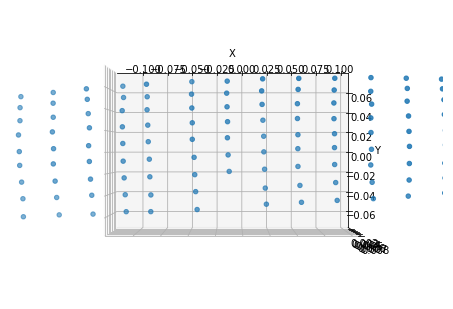

In [104]:
ax.view_init(90, -90)
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.axis('equal')
plt.show()

In [1]:
import pandas as pd
def get_max_disp():
    init_pos_df = pd.read_csv('../db/chongqi/2.txt.new', sep=' ', names=('x', 'y' , 'z'))
    pressure_8_pos_df = pd.read_csv('../db/chongqi/8.txt.new', sep=' ', names=('x', 'y', 'z'))
    pressure_8_pos_df['disp'] = pressure_8_pos_df.apply(lambda x0: min(init_pos_df.apply(lambda x: np.sqrt(np.sum(np.square(x-x0))), axis=1)), axis=1)
    return pressure_8_pos_df

In [18]:
get_max_disp()

0.0078756863704557544

In [19]:
get_max_disp()

0.0078780599095630132

In [20]:
get_max_disp()

0.0078779119720001796

In [21]:
get_max_disp()

0.0078779119720001796

In [22]:
get_max_disp()

0.0078739808884146535

In [23]:
min(pressure_10_pos_df['disp'])

0.0014394601214642816

In [25]:
err = {'a':1, 'b':2, 'c': 3}

In [29]:
print('\n'.join(['the error of {fn} is {er:.5e}'.format(fn=f, er=e) for f, e in err.items()]))

the error of a is 1.00000e+00
the error of b is 2.00000e+00
the error of c is 3.00000e+00


In [30]:
get_max_disp()

0.0078692669868585703

In [31]:
pressure_10_pos_df.sort_values('disp')

,x,y,z,disp
60,-0.411503,0.005518,-0.854220,0.001439
43,-0.410266,0.014727,-0.862324,0.001458
56,-0.439765,0.004882,-0.871988,0.001525
69,-0.441002,-0.004260,-0.864122,0.001633
83,-0.440858,-0.012263,-0.858709,0.001667
137,-0.438477,-0.053806,-0.846650,0.001672
152,-0.437162,-0.065509,-0.847345,0.001718
79,-0.411411,-0.004646,-0.847185,0.001839
159,-0.406781,-0.065964,-0.834677,0.001888
128,-0.439350,-0.045416,-0.847430,0.001898


In [3]:
import numpy as np
test_8_pos = get_max_disp()

In [4]:
test_8_pos.sort_values('disp')

,x,y,z,disp
214,-0.428713,-0.063411,-0.867661,0.000729
191,-0.401635,0.005423,-0.883363,0.000742
223,-0.427305,-0.075086,-0.868515,0.000754
195,-0.431217,-0.004605,-0.892346,0.000767
198,-0.402587,-0.003851,-0.875308,0.000776
200,-0.432189,-0.013822,-0.884596,0.000807
211,-0.429696,-0.055042,-0.868370,0.000811
203,-0.431823,-0.021859,-0.879280,0.000816
201,-0.402206,-0.014078,-0.868407,0.000845
162,-0.430380,-0.046312,-0.869830,0.000846


In [1]:
import numpy as np
condi = np.array([[False, True], [True, False]])
a = np.array([[1, 32], [22, 4]])
b = np.array([[4, 3], [3, 54]])

In [2]:
for c, x, y in zip(condi, a, b):
    print(c, x, y)

[False  True] [ 1 32] [4 3]
[ True False] [22  4] [ 3 54]


In [15]:
patch_data = [[-0.20095783 -0.07055094 -0.81506591]
 [-0.20155981 -0.05315444 -0.81319292]
 [-0.20243886 -0.03699375 -0.81358777]
 [-0.20387387 -0.02084438 -0.81614597] [-0.20418594 -0.00752461 -0.81976856] [-0.2056686 0.00851 -0.82650538]
 [-0.20551923  0.02245181 -0.83441979]
 [-0.20594006  0.03516023 -0.8441582 ]
 [-0.20576031  0.04598803 -0.85460398]
 [-0.16680654 -0.06868766 -0.81144356]
 [-0.16830662 -0.05155778 -0.80977361]
 [-0.16882256 -0.0355468  -0.81014536]
 [-0.17009272 -0.01903163 -0.81263122]
 [-0.1700136  -0.00449756 -0.81654054]
 [-0.17187844  0.01161113 -0.82334863]
 [-0.17221016  0.0258539  -0.83151392]
 [-0.17290097  0.0394879  -0.84204077]
 [-0.17358535  0.0500392  -0.85241649]]

SyntaxError: invalid syntax (<ipython-input-15-25d00a83a99e>, line 7)

In [22]:
test_data = test_8_pos.sort_values('x')


In [23]:
test_data

,x,y,z,disp
200,-0.432189,-0.013822,-0.884596,0.000807
203,-0.431823,-0.021859,-0.879280,0.000816
148,-0.431458,-0.029775,-0.875296,0.000865
195,-0.431217,-0.004605,-0.892346,0.000767
156,-0.430924,-0.037936,-0.872110,0.000910
162,-0.430380,-0.046312,-0.869830,0.000846
211,-0.429696,-0.055042,-0.868370,0.000811
214,-0.428713,-0.063411,-0.867661,0.000729
223,-0.427305,-0.075086,-0.868515,0.000754
198,-0.402587,-0.003851,-0.875308,0.000776


In [25]:
test_data = test_data.iloc[:27, :]

In [26]:
test_data

,x,y,z,disp
200,-0.432189,-0.013822,-0.884596,0.000807
203,-0.431823,-0.021859,-0.879280,0.000816
148,-0.431458,-0.029775,-0.875296,0.000865
195,-0.431217,-0.004605,-0.892346,0.000767
156,-0.430924,-0.037936,-0.872110,0.000910
162,-0.430380,-0.046312,-0.869830,0.000846
211,-0.429696,-0.055042,-0.868370,0.000811
214,-0.428713,-0.063411,-0.867661,0.000729
223,-0.427305,-0.075086,-0.868515,0.000754
198,-0.402587,-0.003851,-0.875308,0.000776


In [27]:
tris_x = test_data['x'].tolist()

In [28]:
tris_y = test_data['y'].tolist()

In [31]:
import matplotlib.tri as mtri

In [32]:
import matplotlib.pyplot as plt


In [33]:
fig = plt.figure()
ax = fig.add_subplot(111)

In [35]:
ax.scatter(tris_x, tris_y,s=10, c='r')

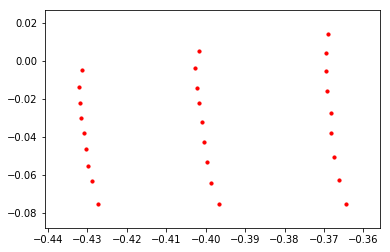

In [36]:
plt.show()

In [37]:
test_tris = mtri.Triangulation(tris_x, tris_y)

In [38]:
d = test_data['disp'].tolist()

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [45]:
fig  =plt.figure()

In [46]:
ax = fig.add_subplot(111, projection='3d')


In [47]:
ax.plot_trisurf(tris_x, tris_y, d, triangles=test_tris.triangles, cmap=plt.cm.Spectral)

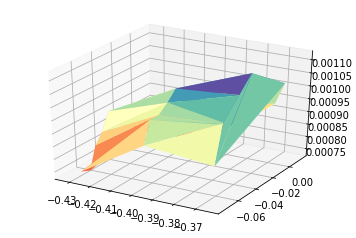

In [48]:
plt.show()

In [55]:
plat_x = np.array(tris_x)
plat_x


array([-0.43218898, -0.43182348, -0.4314585 , -0.43121708, -0.43092358,
       -0.43037987, -0.42969571, -0.42871317, -0.42730525, -0.40258734,
       -0.40220623, -0.40173065, -0.40163486, -0.40093186, -0.40033003,
       -0.3996289 , -0.39862528, -0.39662411, -0.36949238, -0.36945458,
       -0.36929373, -0.36895812, -0.36832679, -0.36814691, -0.36743711,
       -0.36616375, -0.36451014])

In [56]:
plat_x[test_tris.triangles]

array([[-0.36451014, -0.36895812, -0.36814691],
       [-0.39662411, -0.39862528, -0.42730525],
       [-0.36895812, -0.40163486, -0.36945458],
       [-0.40093186, -0.36814691, -0.40173065],
       [-0.40173065, -0.4314585 , -0.40093186],
       [-0.40093186, -0.4314585 , -0.43092358],
       [-0.43092358, -0.4314585 , -0.43037987],
       [-0.36451014, -0.36814691, -0.36616375],
       [-0.36616375, -0.39662411, -0.36451014],
       [-0.39862528, -0.39662411, -0.36616375],
       [-0.36832679, -0.36814691, -0.40093186],
       [-0.42730525, -0.39862528, -0.42871317],
       [-0.39862528, -0.3996289 , -0.42871317],
       [-0.36929373, -0.40173065, -0.36814691],
       [-0.4314585 , -0.40173065, -0.43182348],
       [-0.40033003, -0.36832679, -0.40093186],
       [-0.43037987, -0.3996289 , -0.40033003],
       [-0.40093186, -0.43092358, -0.40033003],
       [-0.40033003, -0.43092358, -0.43037987],
       [-0.36743711, -0.3996289 , -0.39862528],
       [-0.39862528, -0.36616375, -0.367

In [59]:
x_mid = plat_x[test_tris.triangles].mean(axis=1)


array([-0.36720506, -0.40751821, -0.38001585, -0.3902698 , -0.41137367,
       -0.42110465, -0.43092065, -0.3662736 , -0.375766  , -0.38713771,
       -0.37913518, -0.41821457, -0.40898912, -0.37972376, -0.42167088,
       -0.38986289, -0.41011293, -0.41072849, -0.4205445 , -0.38856376,
       -0.37740871, -0.38913201, -0.37869798, -0.36724926, -0.36797027,
       -0.41990149, -0.41934593, -0.36897767, -0.3688658 , -0.36930169,
       -0.38019394, -0.39107687, -0.38033078, -0.42187076, -0.4220729 ,
       -0.41192012, -0.3912382 , -0.39142865, -0.41181309, -0.41200355])

In [60]:
np.where(x_mid<-0.4, 1, 0)

array([0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1])

In [61]:
x = np.array(tris_x)
y = np.array(tris_y)

In [75]:
tris = mtri.Triangulation(x, y)

In [76]:
x_var = x[tris.triangles].var(axis=1)

In [80]:
y_var = y[tris.triangles].var(axis=1)

In [81]:
y_var

array([  1.33146409e-03,   2.65927946e-05,   1.91808577e-05,
         1.58411529e-05,   1.72778170e-05,   1.17816955e-05,
         4.55799266e-05,   4.11909563e-04,   3.44804917e-05,
         3.14627090e-05,   1.92777382e-05,   2.81924136e-05,
         2.62694521e-05,   2.17042437e-05,   1.31019971e-05,
         1.77707171e-05,   1.91664811e-05,   1.77594045e-05,
         1.17072879e-05,   3.55669242e-05,   3.74899193e-05,
         2.06171954e-05,   2.74077952e-05,   2.17547607e-04,
         9.12715103e-05,   1.39059126e-05,   2.02819775e-05,
         8.05890154e-05,   2.86431982e-04,   6.30176393e-05,
         2.32350364e-05,   1.26617886e-05,   2.15273441e-05,
         1.94161311e-05,   1.39132904e-05,   1.43740399e-05,
         2.24249915e-05,   2.04985552e-05,   2.07923841e-05,
         2.16525121e-05])

In [82]:
mask = np.where(x_var < 1e-5, 0, 1)

In [83]:
tris.set_mask(mask)

In [84]:
fig = plt.figure()
ax = fig.add_subplot(111)

In [86]:
ax.triplot(tris)

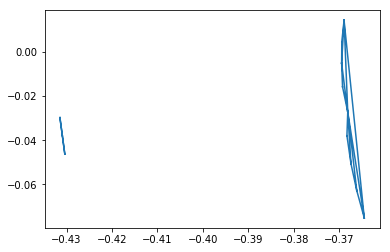

In [87]:
plt.show()

In [88]:
def get_origin_tri():
    ori_tris = mtri.Triangulation(x, y)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.triplot(ori_tris)
    plt.show()

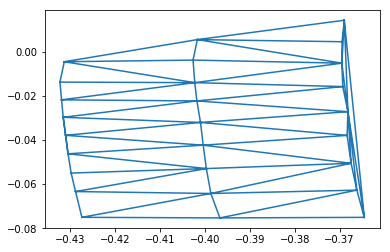

In [89]:
get_origin_tri()

In [90]:
def remove_invalid_grid():
    tris = mtri.Triangulation(x, y)
    x_var = x[tris.triangles].var(axis=1)
    mask = np.where(x_var < 1e-5, 1, 0)
    tris.set_mask(mask)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.triplot(tris)
    plt.show()

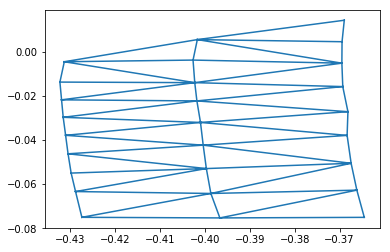

In [91]:
remove_invalid_grid()

In [93]:
ori_tris = mtri.Triangulation(x, y)
len(ori_tris.triangles)

40

In [94]:
x_var = x[ori_tris.triangles].var(axis=1)
mask = np.where(x_var < 1e-5, 1, 0)

In [95]:
ori_tris.set_mask(mask)

In [97]:
ori_tris.triangles

array([[26, 21, 23],
       [17, 16,  8],
       [21, 12, 19],
       [13, 23, 11],
       [11,  2, 13],
       [13,  2,  4],
       [ 4,  2,  5],
       [26, 23, 25],
       [25, 17, 26],
       [16, 17, 25],
       [22, 23, 13],
       [ 8, 16,  7],
       [16, 15,  7],
       [20, 11, 23],
       [ 2, 11,  1],
       [14, 22, 13],
       [ 5, 15, 14],
       [13,  4, 14],
       [14,  4,  5],
       [24, 15, 16],
       [16, 25, 24],
       [24, 14, 15],
       [22, 14, 24],
       [24, 25, 23],
       [23, 22, 24],
       [ 6, 15,  5],
       [ 6,  7, 15],
       [18, 20, 23],
       [18, 23, 21],
       [21, 19, 18],
       [18, 19, 12],
       [11, 20, 10],
       [20, 18, 10],
       [10,  3,  0],
       [ 0,  1, 10],
       [10,  1, 11],
       [ 9, 18, 12],
       [ 9, 10, 18],
       [ 9, 12,  3],
       [ 3, 10,  9]], dtype=int32)

In [99]:
len(ori_tris.get_masked_triangles())

32

In [100]:
d = ori_tris.get_masked_triangles()

In [101]:
tris = mtri.Triangulation(x, y, triangles=d)

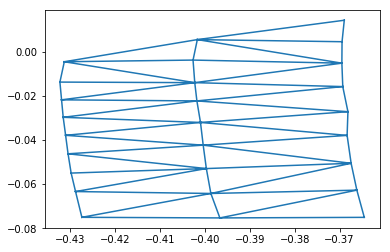

In [102]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.triplot(tris)
plt.show()